In [1]:
using Base.Math
import Base.MathConstants
using HTTP
import JSON
import PrettyPrint
using Plots

In [2]:
function rectangle(w, h, x, y)
    return Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])
end


function get_default_pitch(;scale=3, min_y=0, min_x=0, max_y=80, max_x=120, title="", titlefont=nothing)
    
    if !isnothing(titlefont)
        p = plot([min_y, max_y, max_y, min_y, min_y], [min_x, min_x, max_x, max_x, min_x], legend=false,
            title=title, size=(scale*160, scale*240), linecolor="white", axis=([], false), titlefont=titlefont,
            primary=false)
    else
        p = plot([min_y, max_y, max_y, min_y, min_y], [min_x, min_x, max_x, max_x, min_x], legend=false,
            title=title, size=(scale*160, scale*240), linecolor="white", axis=([], false),
            primary=false)
    end

    # Field rectangle
    plot!(p, rectangle(max_y, max_x, 0, 0), opacity=1, fillcolor="green3", primary=false)
    # Plot halfway line
    plot!(p, [0, max_y], [max_x/2, max_x/2], linecolor="black", primary=false)

    # Plot goals
    goal_size = 8 # yards?
    plot!(p, rectangle(8, -3, (max_y - goal_size)/2, 0), linecolor="black", fillcolor="white", primary=false)
    plot!(p, rectangle(8, 3, (max_y - goal_size)/2, max_x), linecolor="black", fillcolor="white", primary=false)

    # Plot 18-yard box
    plot!(p, rectangle(44, 18, (max_y - goal_size)/2 - 18, 0 ), linecolor="black", fillcolor="green3", primary=false)
    plot!(p, rectangle(44, -18, (max_y - goal_size)/2 - 18, max_x ), linecolor="black", fillcolor="green3", primary=false)
    
    # Plot the 6-yard box
    plot!(p, rectangle(20, 6, (max_y - goal_size)/2 - 6, 0 ), linecolor="black", fillcolor="green3", primary=false)
    plot!(p, rectangle(20, -6, (max_y - goal_size)/2 - 6, max_x ), linecolor="black", fillcolor="green3", primary=false)
    
    # Plot penalty spots
    scatter!(p, [max_y/2, max_y/2], [12, max_x-12], markercolor="black", primary=false)
    
    # Plot the Ds
    pts = Plots.partialcircle(π/6, 5/6*π, 250, 12)
    x, y = Plots.unzip(pts)
    x = x .+ max_y / 2
    y = y .+ 12
    plot!(p, x, y, linecolor="black", primary=false)

    pts = Plots.partialcircle(7π/6, 11π/6, 250, 12)
    x, y = Plots.unzip(pts)
    x = x .+ max_y / 2
    y = y .+ (max_x - 12)
    plot!(p, x, y, linecolor="black", primary=false)
    
    # Plot center circle
    pts = Plots.partialcircle(0, 2π, 250, 10)
    x, y = Plots.unzip(pts)
    x .+= max_y / 2
    y .+= max_x / 2
    plot!(p, x, y, linecolor="black", primary=false)
    return p
end

function plotshot(entry; team_color="blue1", opp_color="red1", scale=3.5, title="Title", font_size=4)
    p = get_default_pitch(title=title, scale=scale, titlefont=font(font_size, "Computer Modern"))
    if !("shot" in keys(entry))
        PrettyPrint.pprint(entry)
    end
    for player in entry["shot"]["freeze_frame"]
        if player["teammate"]
            mc = team_color
        else
            mc = opp_color
        end
        loc = player["location"]
        scatter!(p, [loc[2]], [loc[1]], markercolor=mc, primary=false)
    end
    loc = entry["location"]
    loc2 = entry["shot"]["end_location"][1:2]
    scatter!(p, [loc[2]], [loc[1]], markercolor=team_color, legend=true, label="Shot location",
             markershape=:star4, markersize=7)
    plot!(p, [loc[2], loc2[2]], [loc[1], loc2[1]], linecolor="white", label="Shot path")
    return p
end

plotshot (generic function with 1 method)

In [3]:
url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/three-sixty/3788741.json"

r = HTTP.request("GET", url)

body = JSON.parse(String(r.body))
println(typeof(body))
PrettyPrint.pprint(body[1:5])

Vector{Any}
[
  {
    "freeze_frame" : [
                       {
                         "location" : [43.65321648946649, 
                                       31.98843233703487],
                         "keeper" : false,
                         "teammate" : false,
                         "actor" : false,
                       },
                       {
                         "location" : [43.997359300214555, 
                                       45.59948277519069],
                         "keeper" : false,
                         "teammate" : false,
                         "actor" : false,
                       },
                       {
                         "location" : [49.675715677557776, 
                                       35.43426789099837],
                         "keeper" : false,
                         "teammate" : false,
                         "actor" : false,
                       },
                       {
                         "location"

                      0.0, 84.374134879952, 
                      0.0, 70.0394280648474, 
                      74.4088386427374, 
                      34.5953633899854, 
                      77.2328373069048],
    "event_uuid" : "bea4235d-7e40-461c-bb82-6d473f5bb324",
  },
  {
    "freeze_frame" : [
                       {
                         "location" : [26.93356588491408, 
                                       52.10449632327261],
                         "keeper" : false,
                         "teammate" : true,
                         "actor" : false,
                       },
                       {
                         "location" : [36.20000076293945, 
                                       30.399999618530273],
                         "keeper" : false,
                         "teammate" : true,
                         "actor" : true,
                       },
                       {
                         "location" : [38.63277729664165, 
               

                         "actor" : false,
                       },
                       {
                         "location" : [67.03987830499135, 
                                       12.554715990831667],
                         "keeper" : false,
                         "teammate" : false,
                         "actor" : false,
                       },
                       {
                         "location" : [68.26469440625276, 
                                       37.642790748289826],
                         "keeper" : false,
                         "teammate" : false,
                         "actor" : false,
                       },
                       {
                         "location" : [72.75897636327967, 
                                       44.44392029059054],
                         "keeper" : false,
                         "teammate" : true,
                         "actor" : false,
                       },
                       {
         

In [4]:
temp = body[1]
PrettyPrint.pprint(temp)
print(length(body))

{
  "freeze_frame" : [
                     {
                       "location" : [43.65321648946649, 
                                     31.98843233703487],
                       "keeper" : false,
                       "teammate" : false,
                       "actor" : false,
                     },
                     {
                       "location" : [43.997359300214555, 
                                     45.59948277519069],
                       "keeper" : false,
                       "teammate" : false,
                       "actor" : false,
                     },
                     {
                       "location" : [49.675715677557776, 
                                     35.43426789099837],
                       "keeper" : false,
                       "teammate" : false,
                       "actor" : false,
                     },
                     {
                       "location" : [54.49371502803081, 
                                     30.

12


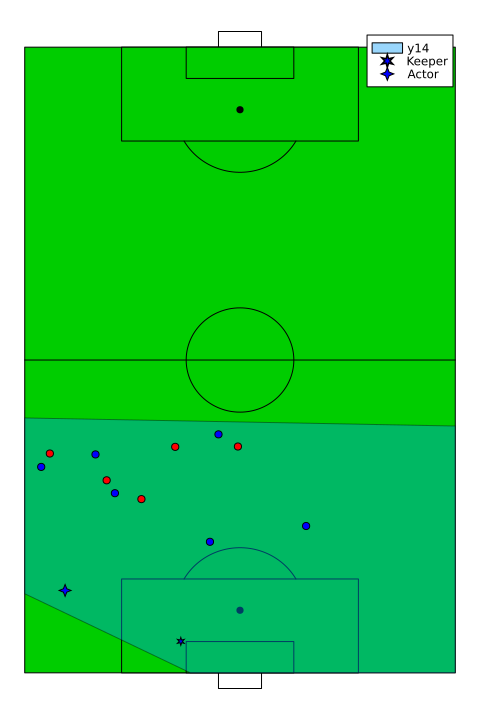

In [44]:
temp = body[10]
team_color = "blue1"
opp_color = "red1"
pts = zeros(Float64, length(temp["visible_area"])÷2, 2)
idx = 1
for i = 1:length(temp["visible_area"])
    if (i%2) == 0
        pts[(i+1)÷2, 2] = temp["visible_area"][i]
    else
        pts[(i+1)÷2, 1] = temp["visible_area"][i]
    end
end
p = get_default_pitch()
plot!(p, Shape(pts[:, 2], pts[:, 1]), opacity=0.4)

for i = 1:length(temp["freeze_frame"])
    player = temp["freeze_frame"][i]
    loc = player["location"]
    if player["teammate"]
        mc = team_color
    else
        mc = opp_color
    end
    
    if player["actor"]
        scatter!(p, [loc[2]], [loc[1]], markercolor=team_color, legend=true, label="Actor",
             markershape=:star4, markersize=6)
    else
        if player["keeper"]
            scatter!(p, [loc[2]], [loc[1]], markercolor=mc, legend=true, label="Keeper",
                     markershape=:star6)
        else
            scatter!(p, [loc[2]], [loc[1]], markercolor=mc, legend=true, primary=false)
        end
    end
end
p

In [5]:
function get_visible_area(entry)
    pts = zeros(Float64, length(entry["visible_area"])÷2, 2)
    for i = 1:length(entry["visible_area"])
        if (i%2) == 0
            # This is floor division, looks like the hand-written division symbol w 2 dots
            # Looks wayyy too much like "+" on my laptop
            pts[(i+1)÷2, 2] = entry["visible_area"][i]
        else
            pts[(i+1)÷2, 1] = entry["visible_area"][i]
        end
    end
    return pts
end

function plot_stats360(entry; team_color="blue1", opp_color="red1")
    p = get_default_pitch()
    if "visible_area" in keys(entry)
        pts = get_visible_area(entry)
        plot!(p, Shape(pts[:, 2], pts[:, 1]), opacity=0.4, primary=false)
    end

    for i = 1:length(entry["freeze_frame"])
        player = entry["freeze_frame"][i]
        loc = player["location"]
        if player["teammate"]
            mc = team_color
        else
            mc = opp_color
        end

        if player["actor"]
            scatter!(p, [loc[2]], [loc[1]], markercolor=team_color, legend=true, label="Actor",
                 markershape=:star4, markersize=6)
        else
            if player["keeper"]
                scatter!(p, [loc[2]], [loc[1]], markercolor=mc, legend=true, label="Keeper",
                         markershape=:star6)
            else
                scatter!(p, [loc[2]], [loc[1]], markercolor=mc, legend=true, primary=false)
            end
        end
    end
    return p
end

plot_stats360 (generic function with 1 method)

In [6]:
stop_idx = 10
anim = @animate for i ∈ 1:stop_idx
    plot_stats360(body[i])
end

Animation("/var/folders/hj/56n7c82s1895w88gm4f9nkh40000gn/T/jl_GALTiI", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"])

[ Info: Saved animation to /Users/akm/Documents/Projects/akm-xg/notebooks/anim_fps1.gif


Plots.AnimatedGif("/Users/akm/Documents/Projects/akm-xg/notebooks/anim_fps1.gif")
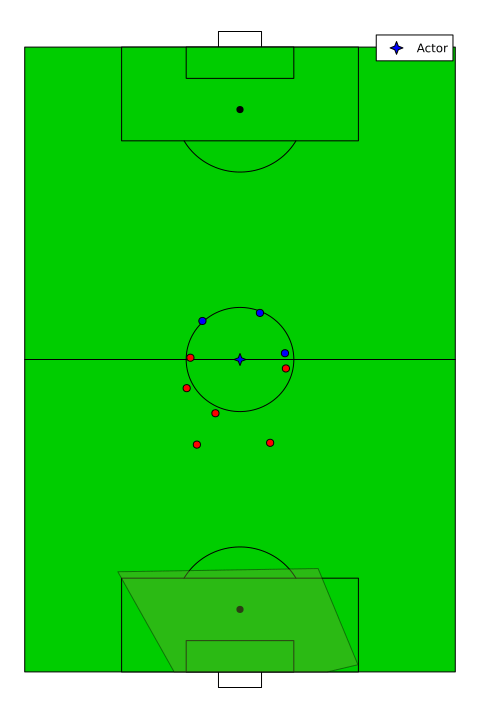

In [7]:
gif(anim, "anim_fps1.gif", fps = 1)